# Toronto anomalies analysis
Anomalies detection and performance measurement

### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import utils
import os.path

### Loading the data

In [2]:
SITE = 7879
channels = pd.read_csv('../dataset/channels.csv')
channels[channels.siteId == SITE].head()

,siteId,channelId,channelName,units,isCalculated
81434,7879,11723,MP1 BTYVOLT,V,False
81435,7879,11722,MP1 UpDEPTH_1,mm,False
81436,7879,11721,MP1 UNIDEPTH,mm,False
81437,7879,11720,MP1 RAWVEL,m/s,False
81438,7879,11719,MP1 PEAKVEL_1,m/s,False


In [25]:
channels[channels.siteId == SITE]

,siteId,channelId,channelName,units,isCalculated
81434,7879,11723,MP1 BTYVOLT,V,False
81435,7879,11722,MP1 UpDEPTH_1,mm,False
81436,7879,11721,MP1 UNIDEPTH,mm,False
81437,7879,11720,MP1 RAWVEL,m/s,False
81438,7879,11719,MP1 PEAKVEL_1,m/s,False
81439,7879,11718,MP1 PDEPTH_1,mm,False
81440,7879,14031,Raw Average Velocity,m/s,False
81441,7879,19696,MP1 VInterim,m/s,False
81442,7879,14232,Rainfall,mm,False
81443,7879,13428,MP1 SILT1,mm,False


### Choosing channel 11718 for the analysis

In [15]:
channels_11718 = pd.read_csv('../dataset/channels-7879-site/channels-7879-11718.csv',parse_dates=['time'])

In [16]:
channels_11718.head()

,time,value
0,2015-05-07 09:40:00,771.070007
1,2015-05-07 09:45:00,771.179993
2,2015-05-07 09:50:00,184.850006
3,2015-05-07 09:55:00,0.000000
4,2015-05-07 10:00:00,0.000000


In [17]:
channels_11718.describe()

,value
count,295453.000000
mean,467.087537
std,89.534717
min,0.000000
25%,421.390015
50%,478.170013
75%,508.510010
max,2550.530029


In [18]:
def moving_average(a, n=3) :
    ret = np.cumsum(a)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [19]:
channels_11718['moving_avg'] = channels_11718['value'].rolling(3).mean()

In [20]:
channels_11718.head()

,time,value,moving_avg
0,2015-05-07 09:40:00,771.070007,NaN
1,2015-05-07 09:45:00,771.179993,NaN
2,2015-05-07 09:50:00,184.850006,575.700002
3,2015-05-07 09:55:00,0.000000,318.676666
4,2015-05-07 10:00:00,0.000000,61.616669


### Hourly mean

In [21]:
#to do

In [22]:
x = channels_11718['time']
y = channels_11718['value']
z = channels_11718['moving_avg']

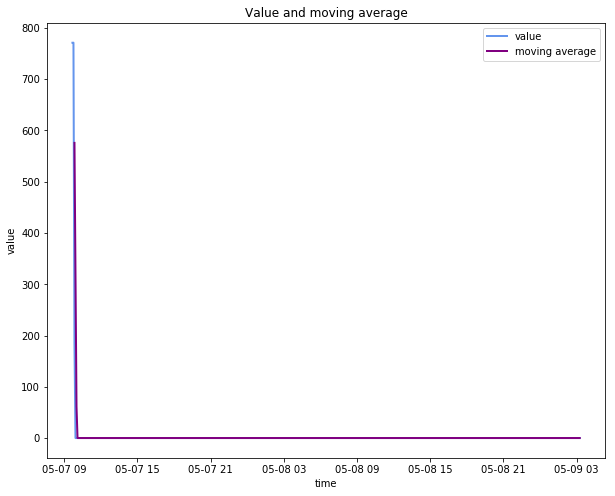

In [23]:
plt.figure(figsize=(10, 8))
plt.plot(x[:500], y[:500], color="cornflowerblue",
         label="value", linewidth=2)
plt.plot(x[:500], z[:500], color="purple",
         label="moving average", linewidth=2)
plt.xlabel("time")
plt.ylabel("value")
plt.title("Value and moving average")
plt.legend()
plt.show()